In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('OnlineRetail.csv' , encoding= 'latin1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [53]:
data[['Quantity' , 'InvoiceDate' , 'UnitPrice' , 'CustomerID']]

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,12/1/2010 8:26,2.55,17850.0
1,6,12/1/2010 8:26,3.39,17850.0
2,8,12/1/2010 8:26,2.75,17850.0
3,6,12/1/2010 8:26,3.39,17850.0
4,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...
541904,12,12/9/2011 12:50,0.85,12680.0
541905,6,12/9/2011 12:50,2.10,12680.0
541906,4,12/9/2011 12:50,4.15,12680.0
541907,4,12/9/2011 12:50,4.15,12680.0


In [54]:
# Revenue = Active Customer Count * Order Count * Average Revenue per Order
# monthly revenue ? 

In [55]:
#convert  InvoiceDate from string to datetime.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# keep month & year --> year+month  --> year*100 + month
data['Year_month'] = data['InvoiceDate'].map(lambda date: date.year*100 + date.month)


data['Revenue'] = data['Quantity'] * data['UnitPrice']

data[['Quantity' , 'Year_month' , 'UnitPrice' , 'CustomerID' , 'Revenue']]


,Quantity,Year_month,UnitPrice,CustomerID,Revenue
0,6,201012,2.55,17850.0,15.30
1,6,201012,3.39,17850.0,20.34
2,8,201012,2.75,17850.0,22.00
3,6,201012,3.39,17850.0,20.34
4,6,201012,3.39,17850.0,20.34
...,...,...,...,...,...
541904,12,201112,0.85,12680.0,10.20
541905,6,201112,2.10,12680.0,12.60
541906,4,201112,4.15,12680.0,16.60
541907,4,201112,4.15,12680.0,16.60


In [56]:
revenue = data.groupby(['Year_month'])['Revenue'].sum().reset_index() 
# groupby is just for year_month ,, and sum is just for revenue (majmooe daraamad ha)
revenue

,Year_month,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


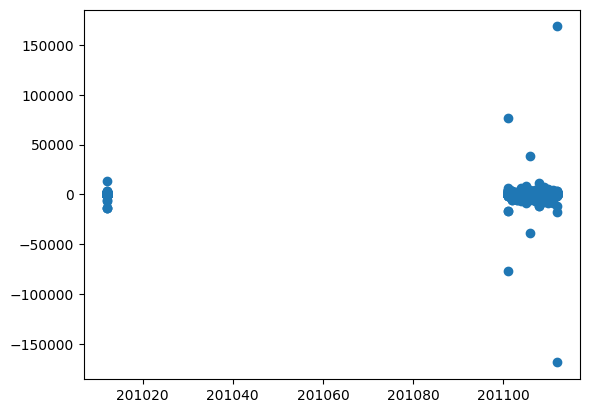

In [57]:
plt.scatter(data['Year_month'] , data['Revenue'])

Text(0, 0.5, 'revenue')

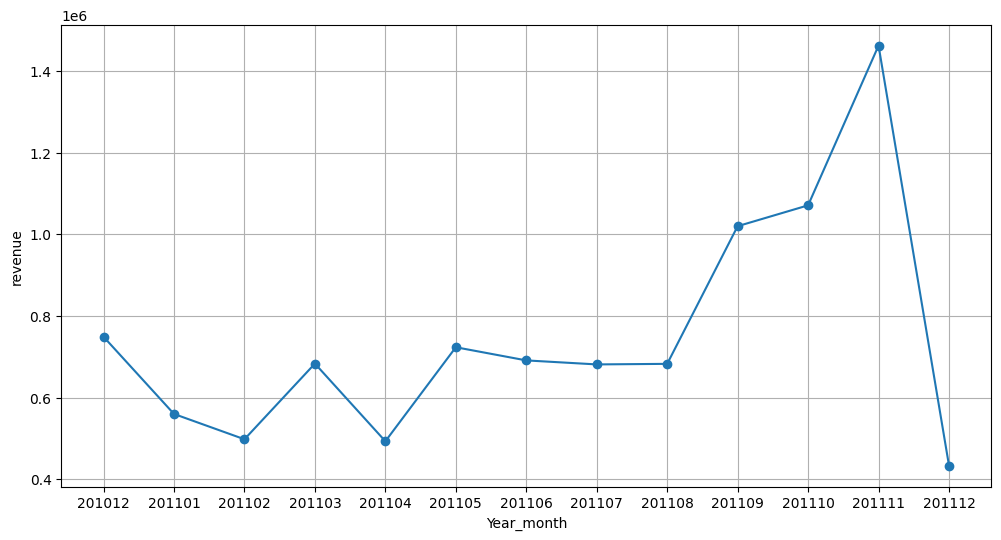

In [58]:
plt.figure(figsize= (12,6))
plt.plot(revenue['Year_month'].to_numpy(dtype=str) , revenue['Revenue'] , marker= 'o')
plt.grid()
plt.xlabel("Year_month")
plt.ylabel("revenue")

In [59]:
# Monthly Revenue Growth Rate:   using pct_change() function 
# percentage of value change between prior and current value element

revenue['MonthlyGrowth'] = revenue['Revenue'].pct_change()
revenue
#NaN = meghdare mahe ghablesho nadarim 

,Year_month,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,681300.111,-0.014213
8,201108,682680.510,0.002026
9,201109,1019687.622,0.493653


Text(0, 0.5, 'growth rate')

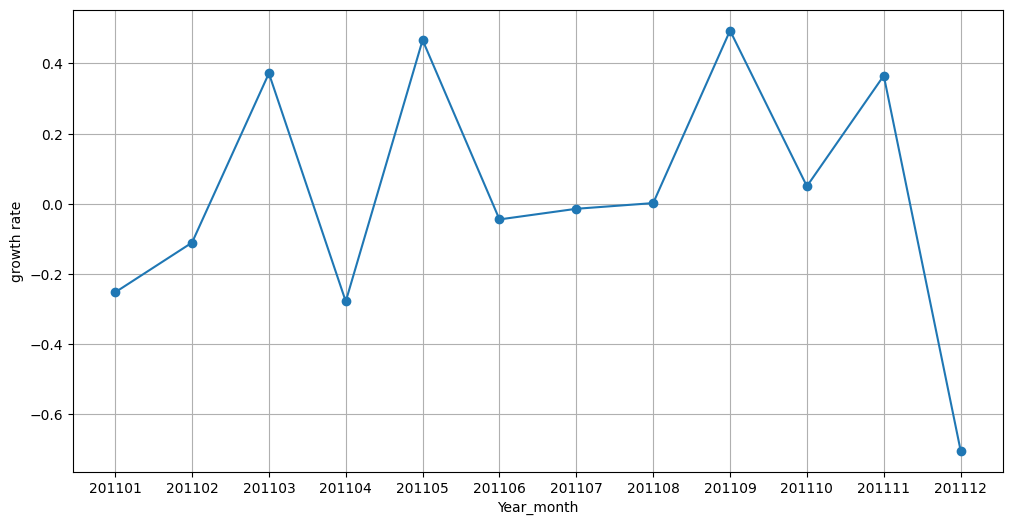

In [60]:
plt.figure(figsize=(12,6))
plt.plot(revenue['Year_month'].to_numpy(dtype=str) ,  revenue['MonthlyGrowth'].to_numpy() , marker='o' )
plt.grid()
plt.xlabel("Year_month")
plt.ylabel("growth rate")

Text(0, 0.5, 'growth revenue rate')

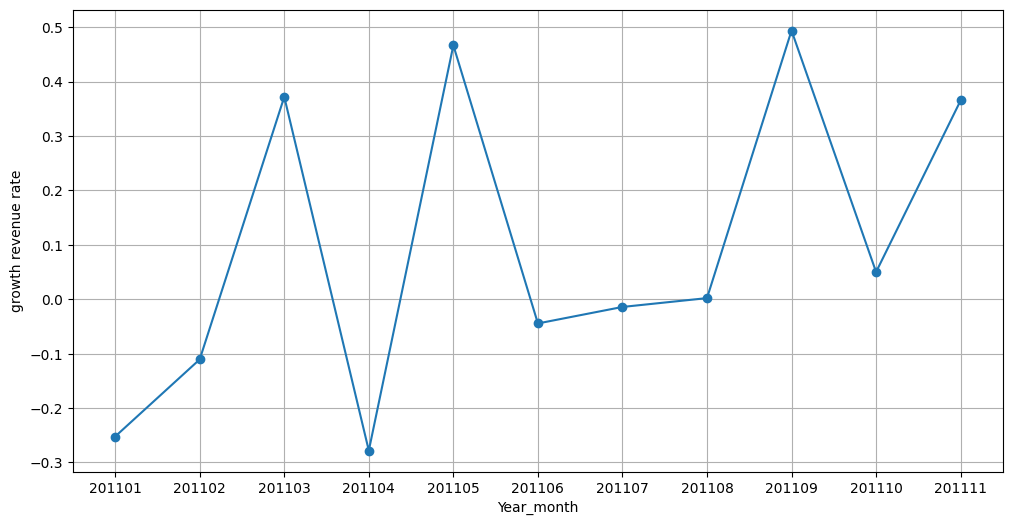

In [61]:
# ommit the last part of figure because of incompleteness of data (in 201112)
plt.figure(figsize=(12,6))
plt.plot( revenue.query('Year_month < 201112')['Year_month'].to_numpy(dtype=str)   ,   revenue.query('Year_month < 201112' )['MonthlyGrowth'].to_numpy()   , marker='o')
plt.grid()
plt.xlabel("Year_month")
plt.ylabel("growth revenue rate")
# the monthly growth of this shop has been decreased a lot on APRIL
# میزان رشد درآمد ماهانه این فروشگاه به منفی ۳۶ درصد رسیده در ماه آپریل

In [62]:
'''
what happend in april ? 

1- first assumption  : less active customers numbers 
2- second assumption : customers did less orders
3- third assumption  : they buy cheaper products  

'''

'\nwhat happend in april ? \n\n1- first assumption  : less active customers numbers \n2- second assumption : customers did less orders\n3- third assumption  : they buy cheaper products  \n\n'

# 1. less active customers numbers ? 

In [63]:

# start analysing dataframe only with uk customers :
UK_data = data.query('Country == "United Kingdom" ').reset_index(drop=True)


# number of unique customers in each month :
monthly_active_customer = UK_data.groupby('Year_month')['CustomerID'].nunique().reset_index()

monthly_active_customer


,Year_month,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


Text(0, 0.5, 'monthly_active_customer_number')

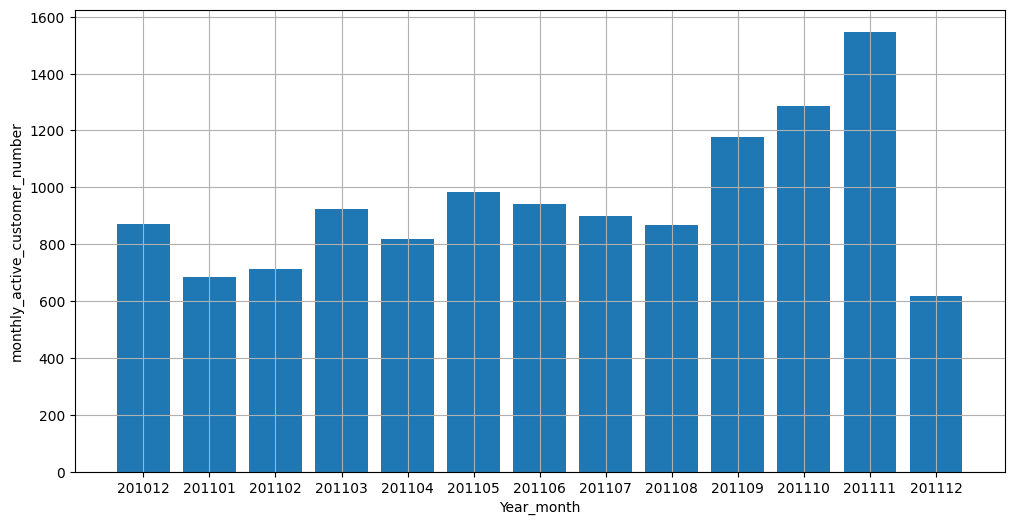

In [64]:
# monthly active customer

plt.figure(figsize=(12,6))
plt.bar(monthly_active_customer['Year_month'].to_numpy(dtype=str) , monthly_active_customer['CustomerID'].to_numpy()  )


plt.grid()
plt.xlabel("Year_month")
plt.ylabel("monthly_active_customer_number")

In [65]:
'''
در ماه آپریل درسته که تعداد مشتری های فعال کم شده ولی میزان کاهش اش نسبت به ماه های دیگر چشمگیر نیست 
پس این فرض درست نبود 
از ۹۲۳ در ماه مارچ ، به ۸۱۷ رسیده که تغییر زیادی نیست 
'''

'\nدر ماه آپریل درسته که تعداد مشتری های فعال کم شده ولی میزان کاهش اش نسبت به ماه های دیگر چشمگیر نیست \nپس این فرض درست نبود \nاز ۹۲۳ در ماه مارچ ، به ۸۱۷ رسیده که تغییر زیادی نیست \n'

# 2- second assumption : customers did less orders

In [66]:
# 2- second assumption : customers did less orders

monthly_order_count = UK_data.groupby(['Year_month'])['Quantity'].sum().reset_index()
# مجموع تعداد سفارشات
monthly_order_count

,Year_month,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


Text(0, 0.5, 'Quantity of orders')

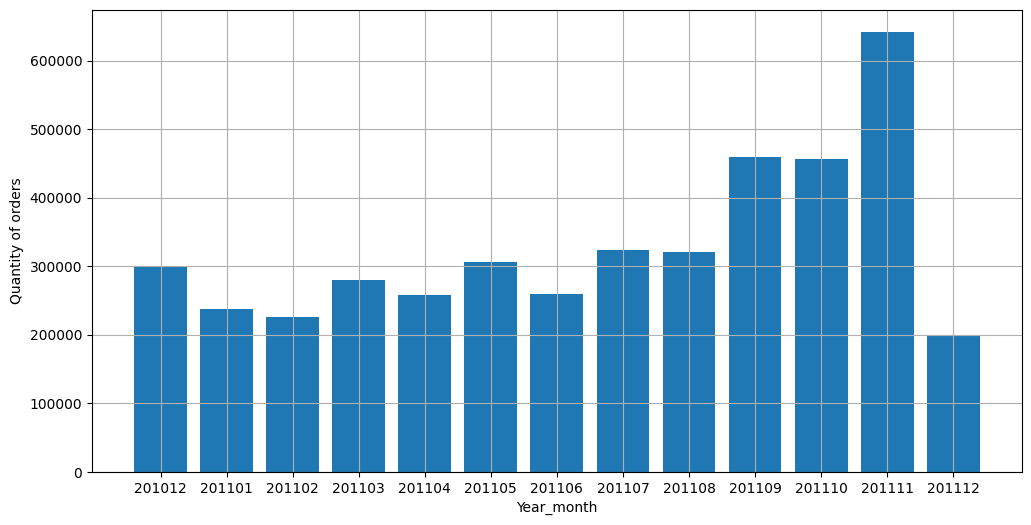

In [67]:
plt.figure(figsize=(12,6))
plt.bar(monthly_order_count['Year_month'].to_numpy(dtype=str)  ,  monthly_order_count['Quantity'].to_numpy()  )
plt.grid()
plt.xlabel("Year_month")
plt.ylabel("Quantity of orders")

In [68]:
'''
در ماه آپریل یعنی ماه ۴ ام ، تعداد سفارشات نسبت به ماه بعدش و ماه قبلش کمتر شده ولی باز هم مقدار کاهش نسبی اش آنچنان زیاد نیست
پس در ماه آپریل سفارشات خیلی کمتر نشده است به نسبت ماه های دیگر 
تعداد سفارش ها فقط ۸ درصد کاهش یافته است 
'''

'\nدر ماه آپریل یعنی ماه ۴ ام ، تعداد سفارشات نسبت به ماه بعدش و ماه قبلش کمتر شده ولی باز هم مقدار کاهش نسبی اش آنچنان زیاد نیست\nپس در ماه آپریل سفارشات خیلی کمتر نشده است به نسبت ماه های دیگر \nتعداد سفارش ها فقط ۸ درصد کاهش یافته است \n'

# 3- third assumption  : do they buy cheaper products ?


In [69]:

# data['Revenue'] = data['Quantity'] * data['UnitPrice']

monthly_ordercount_average = UK_data.groupby('Year_month')['Revenue'].mean().reset_index()

monthly_ordercount_average


,Year_month,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


Text(0, 0.5, 'average ordercount')

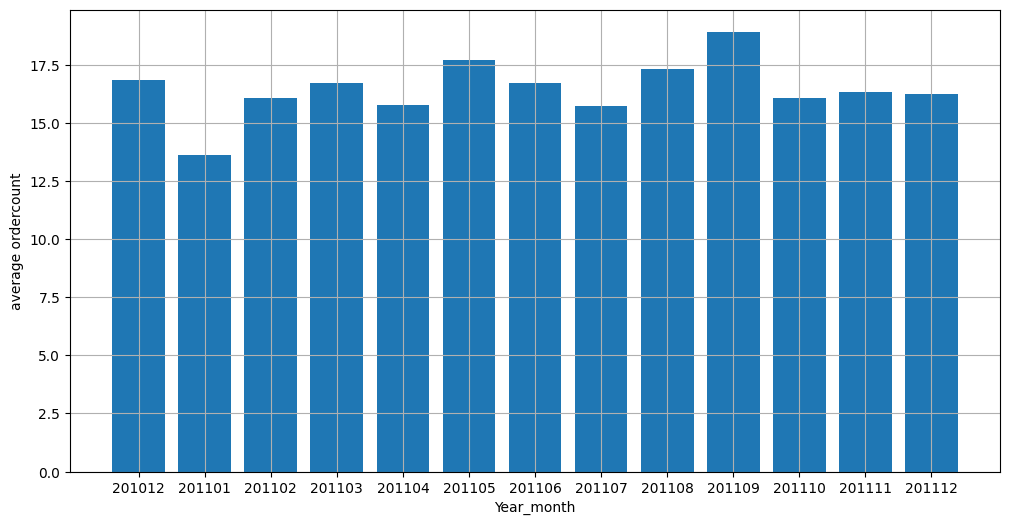

In [70]:
plt.figure(figsize=(12,6))
plt.bar(monthly_ordercount_average['Year_month'].to_numpy(dtype=str) , monthly_ordercount_average['Revenue'].to_numpy())
plt.grid()
plt.xlabel("Year_month")
plt.ylabel("average ordercount")

In [71]:
# در ماه آپریل مشتری ها اجناس ارزون تری خریدن ولی به نسبت ماه های دیگه خیلی کمتر نیست میزانش 
# در ماه جولای میزان ارزون تر خریدن برابر با میزان ماه آپریل بوده 
# پس ارزون تر خریدن هم دلیل مشکل در ماه آپریل نیست 

# 4- new customer ratio :

In [72]:
# 4- new customer ratio : 


#create a dataframe contaning CustomerID and first purchase date
min_purchase = UK_data.groupby('CustomerID')['InvoiceDate'].min().reset_index()
min_purchase.columns = ["CustomerID" , "MinPurchaseDate"]
min_purchase['MinPurchaseYearMonth'] = min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month  )

UK_data = pd.merge(UK_data , min_purchase, on='CustomerID')


min_purchase

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101
...,...,...,...
3945,18280.0,2011-03-07 09:52:00,201103
3946,18281.0,2011-06-12 10:53:00,201106
3947,18282.0,2011-08-05 13:35:00,201108
3948,18283.0,2011-01-06 14:14:00,201101


In [73]:
UK_data['UserType'] = 'New'
UK_data.loc[ UK_data['Year_month'] > UK_data['MinPurchaseYearMonth'] , 'UserType' ] = 'Existing'


UK_data[['Year_month' , 'MinPurchaseYearMonth' ,'UserType']].query("Year_month != 201012 and Year_month != 201112")



,Year_month,MinPurchaseYearMonth,UserType
297,201102,201012,Existing
298,201102,201012,Existing
299,201102,201012,Existing
300,201102,201012,Existing
301,201102,201012,Existing
...,...,...,...
361020,201111,201111,New
361021,201111,201111,New
361022,201111,201111,New
361023,201111,201111,New


In [74]:

user_type_revenue = UK_data.groupby(['Year_month','UserType'])['Revenue'].sum().reset_index()

user_type_revenue.query("Year_month != 201012 and Year_month != 201112")

,Year_month,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


Text(0, 0.5, 'revenue')

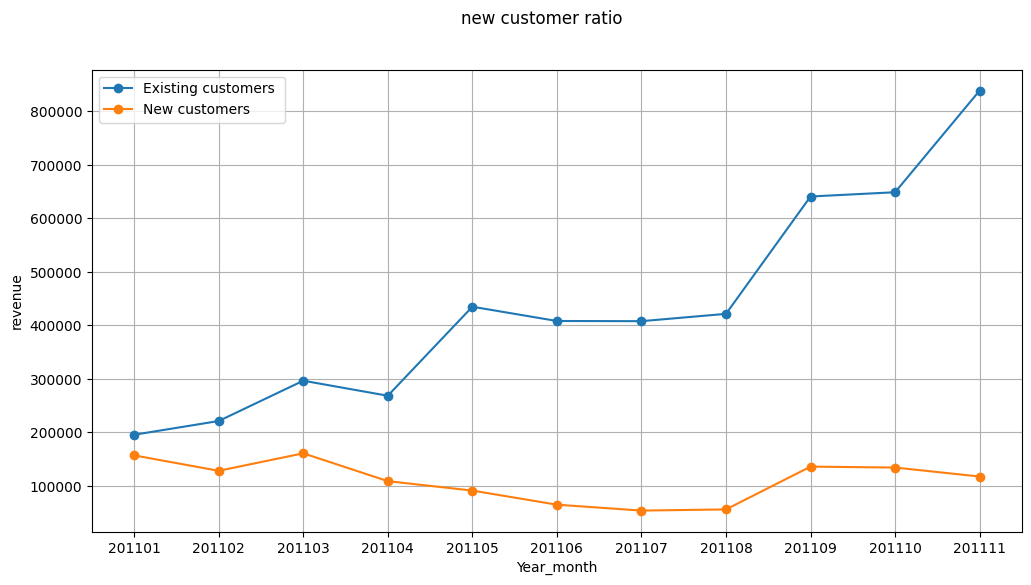

In [75]:
plt.figure(figsize=(12 , 6))

plt.plot(user_type_revenue.query('Year_month != 201012 and Year_month != 201112 and  UserType == "Existing" ')['Year_month'].to_numpy(dtype=str)  ,  (user_type_revenue.query('Year_month != 201012 and Year_month != 201112  and   UserType == "Existing" ')['Revenue'].to_numpy())  , marker="o" )
plt.plot(user_type_revenue.query('Year_month != 201012 and Year_month != 201112 and  UserType == "New" ')     ['Year_month'].to_numpy(dtype=str)  ,  (user_type_revenue.query('Year_month != 201012 and Year_month != 201112  and  UserType == "New" ')     ['Revenue'].to_numpy())  , marker="o")

plt.grid()
plt.suptitle("new customer ratio")
plt.legend(["Existing customers " , "New customers "])
plt.xlabel("Year_month")
plt.ylabel("revenue")

In [76]:
'''
نمودار بالا نشان می دهد که نرخ رشد خرید مشتریان جدید در ماه آپریل منفی بوده 
و نرخ رشد خرید مشتریان قدیمی صعودی است

یعنی میزان خرید مشتریان قدیمی افزایش داشته است 
اما میزان خرید مشتریان جدید کاهش داشته 
 
'''

'\nنمودار بالا نشان می دهد که نرخ رشد خرید مشتریان جدید در ماه آپریل منفی بوده \nو نرخ رشد خرید مشتریان قدیمی صعودی است\n\nیعنی میزان خرید مشتریان قدیمی افزایش داشته است \nاما میزان خرید مشتریان جدید کاهش داشته \n \n'

In [77]:
user_ratio = UK_data.query("UserType == 'New'").groupby(['Year_month'])['CustomerID'].nunique()  /   UK_data.query("UserType == 'Existing'").groupby(['Year_month'])['CustomerID'].nunique() 
user_ratio = user_ratio.reset_index().dropna()

user_ratio


,Year_month,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


Text(0, 0.5, 'user_ratio')

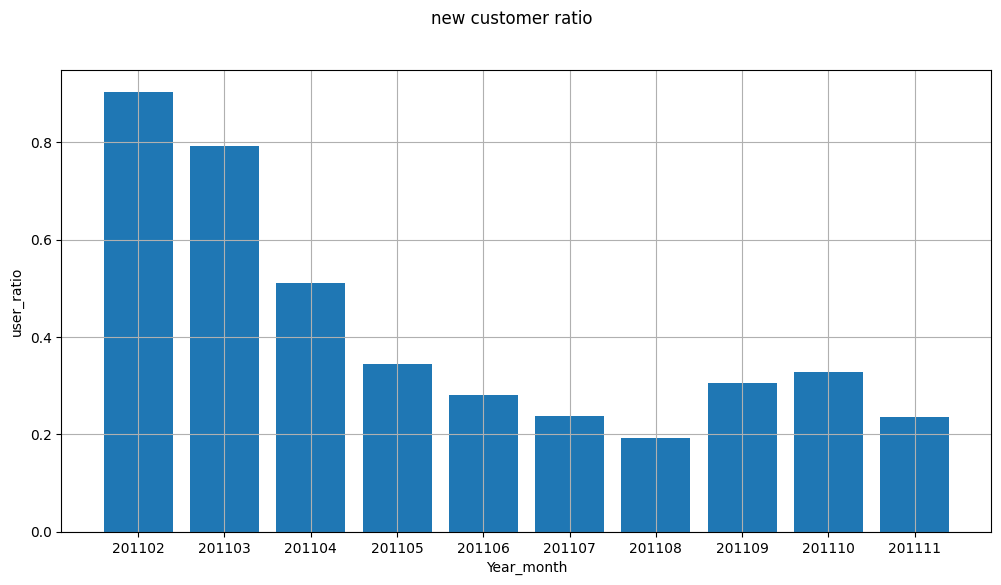

In [78]:
plt.figure(figsize=(12 , 6))

plt.bar(user_ratio.query("Year_month > 201101 and Year_month  <  201112 ")['Year_month'].to_numpy(dtype=str)  ,  (user_ratio.query("Year_month  >  201101  and  Year_month < 201112")['CustomerID'].to_numpy())   )

plt.grid()
plt.suptitle("new customer ratio")
plt.xlabel("Year_month")
plt.ylabel("user_ratio")

# 5- monthly retention rate : 

In [79]:
# 5- monthly retention rate : 
# Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total


#identify which users are active by looking at their revenue per month

each_user_purchase_number = UK_data.groupby(['CustomerID','Year_month'])['Revenue'].sum().reset_index()
each_user_purchase_number

#shows total monthly revenue for each customer:

,CustomerID,Year_month,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
...,...,...,...
12325,18283.0,201110,114.65
12326,18283.0,201111,651.56
12327,18283.0,201112,208.00
12328,18287.0,201105,765.28


## retention table:

### Retention table shows us which customers are active on each month (1 stands for active).


In [80]:
#create retention matrix with crosstab
retention = pd.crosstab(each_user_purchase_number['CustomerID'], each_user_purchase_number['Year_month']).reset_index()

retention.head(10)

Year_month,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
5,12821.0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,12822.0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,12823.0,0,0,1,1,0,0,0,0,1,1,0,0,0
8,12824.0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,12826.0,1,1,0,0,0,0,1,0,0,1,0,1,1


In [81]:
months = retention.columns[2:] # select from third columns to the end 
months

Index([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112],
      dtype='object', name='Year_month')

### calculate Retained Customer Count from previous month and Total Customer Count.

### Monthly Retention Rate = Retained Customers From Prev. Month / Active Customers Total


In [82]:
#create an array of dictionary which keeps Retained & Total User count for each month

retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['Year_month'] = int(selected_month)
    retention_data['TotalUserCount'] = retention[selected_month].sum()
    retention_data['RetainedUserCount'] = retention[(retention[selected_month]>0) & (retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    


# Retention Rate dataframe

In [83]:
#convert the array to dataframe and calculate Retention Rate
retention = pd.DataFrame(retention_array)
retention['RetentionRate'] = retention['RetainedUserCount']  /  retention['TotalUserCount']
retention

,Year_month,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


Text(0, 0.5, 'retention rate')

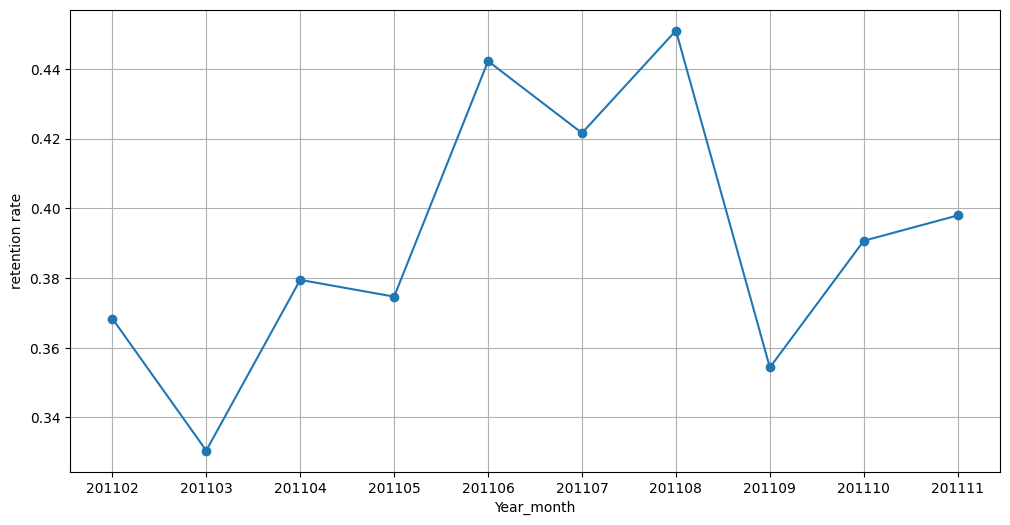

In [84]:
plt.figure(figsize=(12,6))
plt.plot(retention.query("Year_month  < 201112")['Year_month'].to_numpy(str), retention.query("Year_month < 201112")['RetentionRate'].to_numpy() , marker="o")
plt.grid()
plt.xlabel("Year_month")
plt.ylabel("retention rate")